<a href="https://colab.research.google.com/github/MFEshinhyunjin/finefinance/blob/master/Financial_Econometrics_1_simple%20regression%20%2B%20hypothesis%20tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Econometrics for Finance with Python Programming

* Main Refercence : Brooks, Chris (University of Reading)
* Author : Shin Hyunjin
** Education : Financial Engineering, KAIST
** Work : Prop Derivative Trader, Kyobo Securities

금융계량경제학 (파이썬 활용한)

* 주 참고 : 브룩스 교재 (영국 리딩대학교)
* 저자 : 신현진
** 학력 : KAIST 금융공학(애널리틱스전공)
** 경력 : 교보증권 프랍트레이더(파생상품)



---

Part I. Regression Methods
1. Simple Regression
2. Hypothesis Test
3. Estimation and Hypothesis Test


---





---

Ch1. Simple Regression 
(Brooks 3.3, 2019)

* Objectives
1. How to upload and import datasets in Google Colab
2. How to use OLS results



---



In [0]:
#### 1. Simple Regression ####

In [2]:
## Data Upload in Google colab ##

from google.colab import files
uploaded = files.upload() # file upload execution

for fn in uploaded.keys(): # uploaded information
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 3_SandPhedge.xls to 3_SandPhedge.xls
User uploaded file "3_SandPhedge.xls" with length 15360 bytes


In [0]:
#load package
import pandas as pd
import numpy as np
import io
import statsmodels.formula.api as smf

In [0]:
# load data and description

abspath = pd.read_excel(io.BytesIO(uploaded['3_SandPhedge.xls']), index_col=0)
print(abspath.head())
#if string
# pd.read_excel(io.StringIO(uploaded['file_name'].decode('utf-8')))

data = abspath

In [21]:
formula = 'Spot ~ Futures'
results = smf.ols(formula, data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Spot   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1726.
Date:                Mon, 13 Jan 2020   Prob (F-statistic):           5.16e-48
Time:                        00:23:43   Log-Likelihood:                -325.20
No. Observations:                  66   AIC:                             654.4
Df Residuals:                      64   BIC:                             658.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.1107     27.711      0.762      0.4

In [0]:
# Log diff : more intermediated method #

def LogDiff(x):
  x_diff = 100 * np.log(x/x.shift(1))
  x_diff = x_diff.dropna()
  return x_diff

data = pd.DataFrame({'ret_spot' : LogDiff(data['Spot']),
                     'ret_future' : LogDiff(data['Futures'])})
data.head()

In [0]:
data.describe()

In [26]:
formula = 'ret_spot ~ ret_future'
results = smf.ols(formula, data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ret_spot   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8571
Date:                Mon, 13 Jan 2020   Prob (F-statistic):              0.358
Time:                        01:42:36   Log-Likelihood:                -173.51
No. Observations:                  65   AIC:                             351.0
Df Residuals:                      63   BIC:                             355.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3633      0.444      0.818      0.4



---

Ch2. Hypothesis Testing 

(Brooks 3.8-3.9)

* Objective
1. t test
2. F test


---
* Contents
H0 : Beta = 0
H1 : Beta not equal 0

we use p value whether it is less or higher than significance level.

if p value is larger than significance level, no h0 rejection.
else h0 rejection.

In [33]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

data = pd.read_excel(io.BytesIO(uploaded['3_SandPhedge.xls']), index_col=0)

# F test with raw Data #
formula = 'Spot ~ Futures'
hypotheses = 'Futures = 1'
results = smf.ols(formula, data).fit()
f_test = results.f_test(hypotheses)
print(f_test)

<F test: F=array([[0.56529798]]), p=0.45488966220666416, df_denom=64, df_num=1>


In [34]:
# F test with return data #

def LogDiff(x):
  x_diff = 100 * np.log(x/x.shift(1))
  x_diff = x_diff.dropna()
  return x_diff

data = pd.DataFrame({'ret_spot' : LogDiff(data['Spot']),
                     'ret_future' : LogDiff(data['Futures'])})

formula = 'ret_spot ~ ret_future'
hypotheses = 'ret_future = 1'
results = smf.ols(formula, data).fit()
f_test = results.f_test(hypotheses)
print(f_test)

<F test: F=array([[42.88455196]]), p=1.2147392466449456e-08, df_denom=63, df_num=1>




---

Ch3. Estimation and hypothesis testing

(Brooks 3.10 - 3.11)


---



In [0]:
### Example 2: CAPM ###

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [0]:
## Data Upload in Google colab ##
from google.colab import files
uploaded = files.upload() # file upload execution

for fn in uploaded.keys(): # uploaded information
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [38]:
# load data and description
abspath = pd.read_excel(io.BytesIO(uploaded['5_capm.xls']), index_col=0)
print(abspath.head())
#if string
# pd.read_excel(io.StringIO(uploaded['file_name'].decode('utf-8')))

data = abspath
print(data.describe(), data.head())

              SANDP  FORD     GM  MICROSOFT    SUN  USTB3M
Date                                                      
2002-01-01  1130.20  0.95  39.55      27.33  17.27    1.73
2002-02-01  1106.73  0.95  41.40      25.02  17.36    1.75
2002-03-01  1147.39  0.90  47.23      25.87  18.04    1.77
2002-04-01  1076.92  0.80  50.12      22.41  15.50    1.78
2002-05-01  1067.14  0.76  48.92      21.84  16.14    1.77
             SANDP       FORD         GM  MICROSOFT        SUN     USTB3M
count    64.000000  64.000000  64.000000  64.000000  64.000000  64.000000
mean   1142.922500   5.663750  32.831562  24.362187  41.376875   2.577031
std     164.177365   6.505966   6.945924   2.527132  23.854843   1.557040
min     815.280000   0.760000  18.440000  18.760000  13.650000   0.880000
25%    1040.035000   1.915000  28.872500  22.617500  17.347500   1.177500
50%    1142.890000   2.650000  31.980000  24.090000  34.085000   1.770000
75%    1254.632500   5.625000  36.835000  25.855000  65.647500   4.02

In [41]:
# Log Adjustment and Data Framing #

def LogDiff(x):
  x_diff = 100 * np.log(x/x.shift(1))
  x_diff = x_diff.dropna()
  return x_diff

# data framing #
data = pd.DataFrame({'ret_sandp' : LogDiff(data['SANDP']),
                     'ret_ford' : LogDiff(data['FORD']),
                     'USTB3M' : data['USTB3M']/12,
                     'ersandp' : LogDiff(data['SANDP'])- data['USTB3M']/12,
                     'erford' : LogDiff(data['FORD']) - data['USTB3M']/12})
data.head()

,ret_sandp,ret_ford,USTB3M,ersandp,erford
Date,,,,,
2002-01-01,NaN,NaN,0.144167,NaN,NaN
2002-02-01,-2.098489,0.000000,0.145833,-2.244322,-0.145833
2002-03-01,3.608008,-5.406722,0.147500,3.460508,-5.554222
2002-04-01,-6.338468,-11.778304,0.148333,-6.486802,-11.926637
2002-05-01,-0.912294,-5.129329,0.147500,-1.059794,-5.276829


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


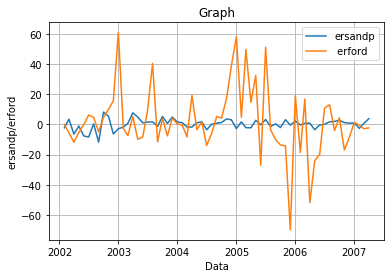

In [42]:
# Visulaization #
# 1. Time Series Plots #
plt.figure(1)
plt.plot(data['ersandp'], label = 'ersandp')
plt.plot(data['erford'], label = ' erford')
plt.xlabel('Data')
plt.ylabel('ersandp/erford')
plt.title('Graph')
plt.grid(True)

plt.legend()
plt.show()

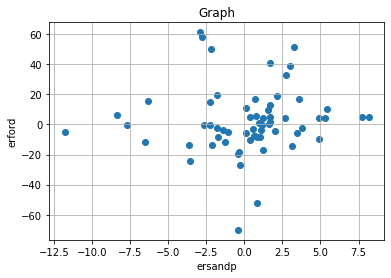

In [43]:
# 2. Scatter Charts #
plt.figure(2)
plt.scatter(data['ersandp'], data['erford'])
plt.xlabel('ersandp')
plt.ylabel('erford')
plt.title('Graph')
plt.grid(True)
plt.show()

In [44]:
## CAPM OLS and Hypothesis Test ##
formula = 'erford ~ ersandp'
results = smf.ols(formula, data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 erford   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.2050
Date:                Mon, 13 Jan 2020   Prob (F-statistic):              0.652
Time:                        06:29:26   Log-Likelihood:                -283.67
No. Observations:                  63   AIC:                             571.3
Df Residuals:                      61   BIC:                             575.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0202      2.801      0.721      0.4

In [0]:
# F test #

In [46]:
hypotheses = 'ersandp=1'
results = smf.ols(formula, data).fit()
f_test = results.f_test(hypotheses)
print(f_test)

<F test: F=array([[0.64954035]]), p=0.4234078402614857, df_denom=61, df_num=1>
